In [41]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib as mpl
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')
import matplotlib.image as mpimg
# mpl.style.use('pof')

In [42]:
Kihara_phi = pd.read_csv('otherdata/extracted_data/Kihara_phi.csv', names=['z_CU0','phi_CU0','z_CU2','phi_CU2','z_CU4','phi_CU4','z_CU8','phi_CU8','z_CU12','phi_CU12','z_CU16','phi_CU16'], 
                         delimiter=',', skiprows=2)
Kihara_CU = np.array((0,2,4,8))
Kihara_phi0 = np.array((Kihara_phi.phi_CU0[0],Kihara_phi.phi_CU2[1],Kihara_phi.phi_CU4[0],Kihara_phi.phi_CU8[0]))*180 # The first point of CU2 is for some reason not right
Kihara_pamp = pd.read_csv('otherdata/extracted_data/Kihara_pamp.csv', names=['z_CU0','pamp_CU0','z_CU2','pamp_CU2','z_CU4','pamp_CU4','z_CU8','pamp_CU8','z_CU12','pamp_CU12','z_CU16','pamp_CU16'], 
                         delimiter=',', skiprows=2)
Kihara_pamp0 = np.array((Kihara_pamp.pamp_CU0[0],Kihara_pamp.pamp_CU2[1],Kihara_pamp.pamp_CU4[0],Kihara_pamp.pamp_CU8[0]))
Kihara_Fp = 0.5*Kihara_pamp0*0.1**2*np.sin(Kihara_phi0/180*np.pi)
Kihara_Fp

array([0.11108016, 0.104475  , 0.1208053 , 0.12103517])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


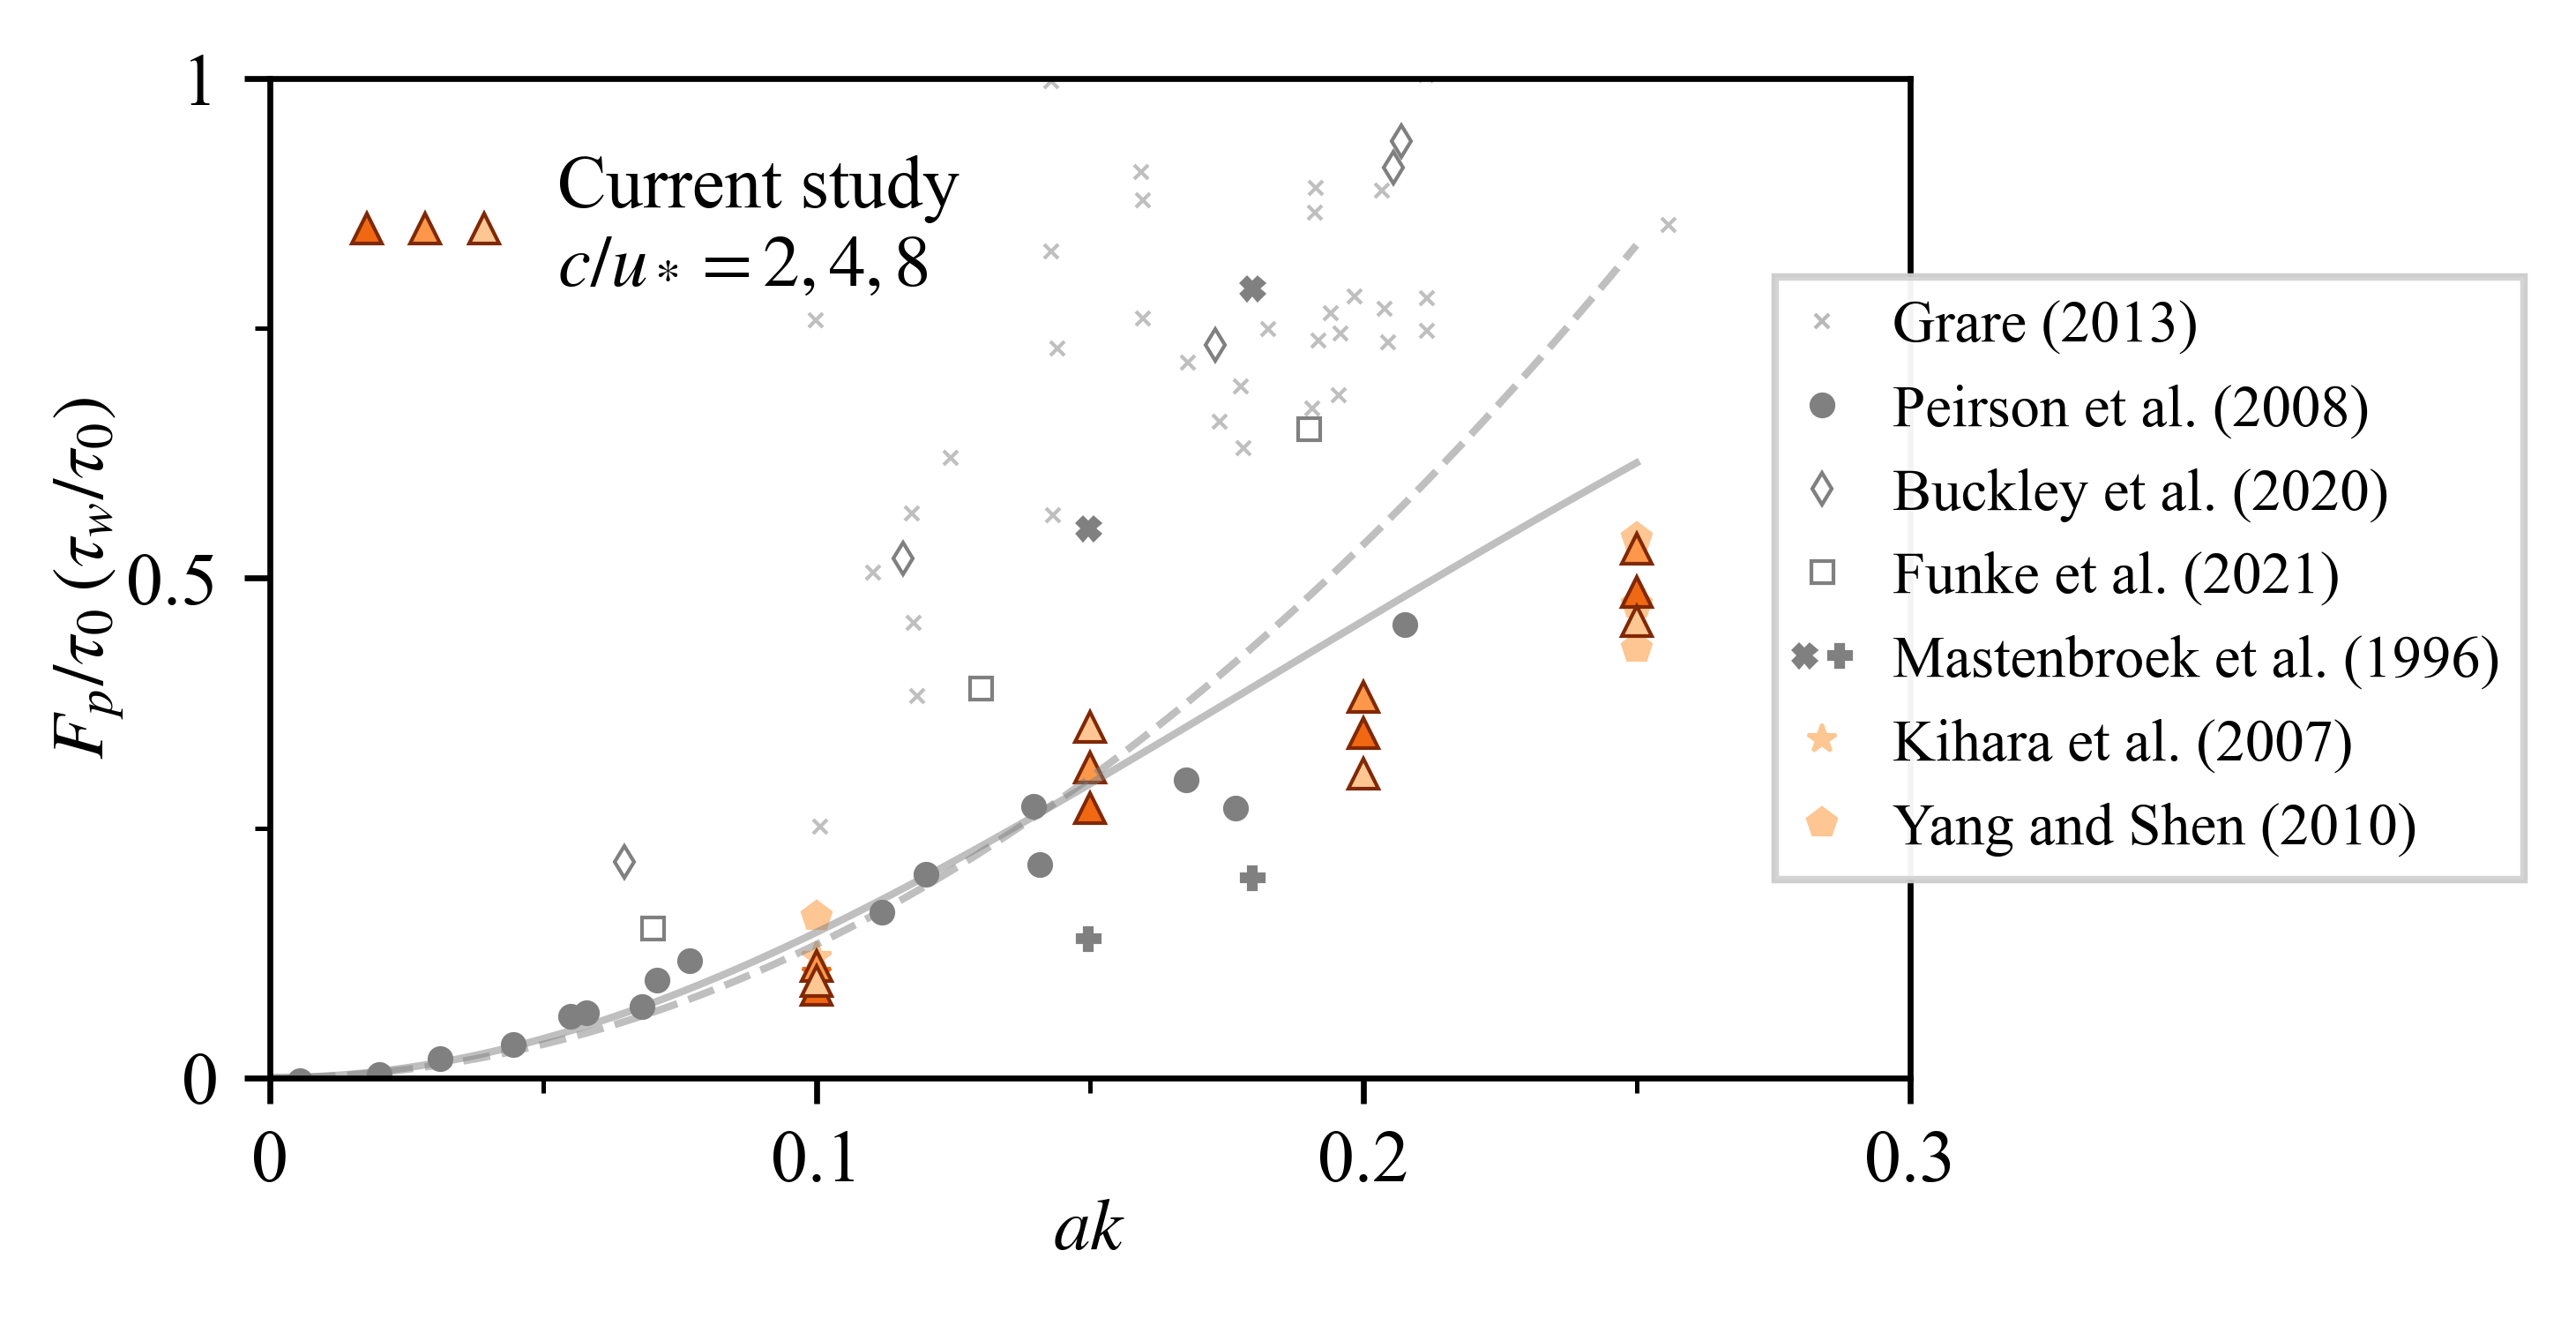

In [58]:
""" FIGURE: drag force compared to literature. """
""" FIGURE: drag coefficient """
fig = plt.figure(figsize=[4,2.5]); ax = plt.gca()
# c = plt.get_cmap('Orange')(np.linspace(0.2,0.8,N))


Grare = pd.read_csv('otherdata/Grare2009.csv', names=['ak', 'drag'], delimiter = ',')
Peirson2008 = pd.read_csv('otherdata/Peirson2008_Fp.csv', names=['ak', 'drag'], delimiter = ',')
Veron = pd.read_csv('otherdata/Veron2020.csv', names=['ak', 'drag'], delimiter = ',')
Masterboenk = pd.read_csv('otherdata/Masterboenk1996.csv', names=['ak', 'drag'], delimiter = ',')

d1, = plt.plot(Grare['ak'], Grare['drag'], marker='x', mfc='none', lw=0, markersize=2, markeredgewidth=0.5, alpha=0.5, color='gray', label='Grare 2009')
d2, = plt.plot(Peirson2008['ak'], Peirson2008['drag'], marker='o', lw=0, markersize=3, markeredgewidth=0.5, alpha=1, color='gray', label='Perison 2008')
""" Add colors for the Veron case later! """
# for (UC_,beta_,ak_) in zip(UC,beta,ak):
#     cchoice = plt.get_cmap('Oranges')((ak_-0.075)/(0.25-0.075)*0.6+0.2) ### RESCALE!
#     plt.plot(UC_, beta_/2/np.pi, marker='d', mfc='none', 
#              lw=0, markersize=3, markeredgewidth=0.5, color=cchoice)
d3, = plt.plot(Veron['ak'], Veron['drag'], marker='d', mfc='none', lw=0, markersize=3, markeredgewidth=0.5, alpha=1, 
               color='gray', label='Veron 2020')
d4, = plt.plot((0.07, 0.13, 0.19), (0.15, 0.39, 0.65), marker='s', mfc='none', lw=0, markersize=3, markeredgewidth=0.5, alpha=1, color='gray', label='Veron 2020 processed')
d5, = plt.plot(Masterboenk['ak'], Masterboenk['drag'], marker='X', lw=0, markersize=3, markeredgewidth=0.5, alpha = 1, color='gray', label='Masterboenk 1996')
d6, = plt.plot(Masterboenk['ak'], 0.5*12.4*Masterboenk['ak']**2, marker='P', lw=0, markersize=3, alpha = 1, markeredgewidth=0.5, color='gray', label='Masterboenk 1996')
d7, = plt.plot(0.1, Kihara_Fp[1], marker='*', lw=0, markersize=4, alpha = 1, markeredgewidth=0.5, color=cmap(29))
d7, = plt.plot(0.1, Kihara_Fp[2], marker='*', lw=0, markersize=4, alpha = 1, markeredgewidth=0.5, color=cmap(27))
d7, = plt.plot(0.1, Kihara_Fp[3], marker='*', lw=0, markersize=4, alpha = 1, markeredgewidth=0.5, color=cmap(25))

d8, = plt.plot((0.1, 0.25, 0.25, 0.25),(0.161, 0.474, 0.54, 0.43), marker='p', lw=0, markersize=4, alpha = 1, markeredgewidth=0.5, color=cmap(25))


plt.xlabel(r'$ak$', labelpad=0)
plt.ylabel(r'$F_p/\tau_0 \; (\tau_w/\tau_0)$', labelpad=0)
plt.ylim([0,1.0])
plt.xlim([0,0.3])

# Orange color (29,27,25)
""" CHANGE THE LABELS! """
for case in (case1,case4,case7,case14):
#     Fp_renorm = case.Fp_aver/(case.Fp_aver + np.average(case.taunu_all, axis=(0,1)))
#     p1, = plt.plot(case.ak, Fp_renorm, marker='x', mfc='none',
#              label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(29), alpha = 1)
    p1, = plt.plot(case.ak, case.Fp_aver/case.tau0, marker='^', mfc=cmap(29),
                   lw=0, markersize=4, color=plt.get_cmap('Oranges')(0.99), alpha = 1, markeredgewidth=0.5)  

""" SPECIAL TREATMENT OF case1 """    
# case = case1 
# case.Fp_aver = np.average(case.Fp[20:40])
# eta1 = np.average(case.phase['eta'][20], axis=0) - np.average(case.phase['eta'][20], axis=(0,1))
# a1 = (np.average(eta1**2)*2)**0.5*4
# eta2 = np.average(case.phase['eta'][40], axis=0) - np.average(case.phase['eta'][40], axis=(0,1))
# a2 = (np.average(eta1**2)*2)**0.5*4
# plt.plot(0.5*(a1+a2), case.Fp_aver/case.tau0, marker='x', mfc='none', lw=0, markersize=3, color=cmap(29), alpha = 1)

for case in (case2,case5,case9,case15):
#     Fp_renorm = case.Fp_aver/(case.Fp_aver + np.average(case.taunu_all, axis=(0,1)))
#     p3, = plt.plot(case.ak, Fp_renorm, marker='x', mfc='none',
#              label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(27), alpha = 1)
    p2, = plt.plot(case.ak, case.Fp_aver/case.tau0, marker='^', mfc=cmap(27),
                   lw=0, markersize=4, color=plt.get_cmap('Oranges')(0.99), alpha = 1, markeredgewidth=0.5)

for case in (case3,case6,case11,case16):
#     Fp_renorm = case.Fp_aver/(case.Fp_aver + np.average(case.taunu_all, axis=(0,1)))
#     p5, = plt.plot(case.ak, Fp_renorm, marker='x', mfc='none',
#              label=r'$c/u_*=%.0f$, ak=%g' %(case.wave.c/case.ustar, case.ak), lw=0, markersize=3, color=cmap(25), alpha = 1)
    p3, = plt.plot(case.ak, case.Fp_aver/case.tau0, marker='^', mfc=cmap(25),
                   lw=0, markersize=4, color=plt.get_cmap('Oranges')(0.99), alpha = 1, markeredgewidth=0.5)

x1 = np.linspace(0,0.25,100)
y1 = x1**2*(0.3/0.15**2)
y2 = x1*1.2*(x1)/(1+6*x1**2)*(0.3/0.15**2)
beta_f = 20; beta_t = 12
y2 = x1**2*(beta_f+beta_t)/(2+beta_f*x1**2)
l1, = plt.plot(x1, y1, c='gray', linestyle='--', alpha=0.5, lw=1)
l2, = plt.plot(x1, y2, c='gray', linestyle='-', alpha=0.5, lw=1)

# legend1 = plt.legend([(p1,p2,p3),l1,l2], [r'$c/u_*=2,4,8$',r'$\frac{1}{2}\beta(ak)^2$','Correction by Belcher'],
#                        handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.01, 0.8), frameon=False, handlelength=2, fontsize=8)
legend1 = plt.legend([(p1,p2,p3)], ['Current study\n' + '$c/u_*=2,4,8$'],
                       handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.01, 0.85), frameon=False, handlelength=2)
legend2 = plt.legend([d1,d2,d3,d4,(d5,d6),d7,d8], ['Grare (2013)','Peirson et al. (2008)','Buckley et al. (2020)','Funke et al. (2021)', 'Mastenbroek et al. (1996)', 'Kihara et al. (2007)', 'Yang and Shen (2010)'],
                    handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.9, 0.5), fancybox=False, fontsize=8, handlelength=0.8)
ax.add_artist(legend1)
ax.add_artist(legend2)

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(0.1)
majorFormatter = FormatStrFormatter('%g')
minorLocator = MultipleLocator(0.05)

ax.xaxis.set_major_locator(majorLocator)
ax.xaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.xaxis.set_minor_locator(minorLocator)

majorLocator = MultipleLocator(0.5)
majorFormatter = FormatStrFormatter('%g')
minorLocator = MultipleLocator(0.25)
ax.yaxis.set_major_locator(majorLocator)
ax.yaxis.set_major_formatter(majorFormatter)
# for the minor ticks, use no labels; default NullFormatter
ax.yaxis.set_minor_locator(minorLocator)
# ax.set_yticks(np.arange(0,1.6,0.4))
# ax.set_xticks(np.arange(0,0.4,0.1))
# fig.savefig('figures/drag_coefficient.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/drag_coefficient.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/drag_coefficient.eps', bbox_inches='tight')

In [108]:
Yang2013_CU6 = pd.read_csv('otherdata/data_comparison/Yang2013_CU6.csv', names=['CU', 'beta'], delimiter = ',')
Yang2013_CU10 = pd.read_csv('otherdata/data_comparison/Yang2013_CU10.csv', names=['CU', 'beta'], delimiter = ',')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


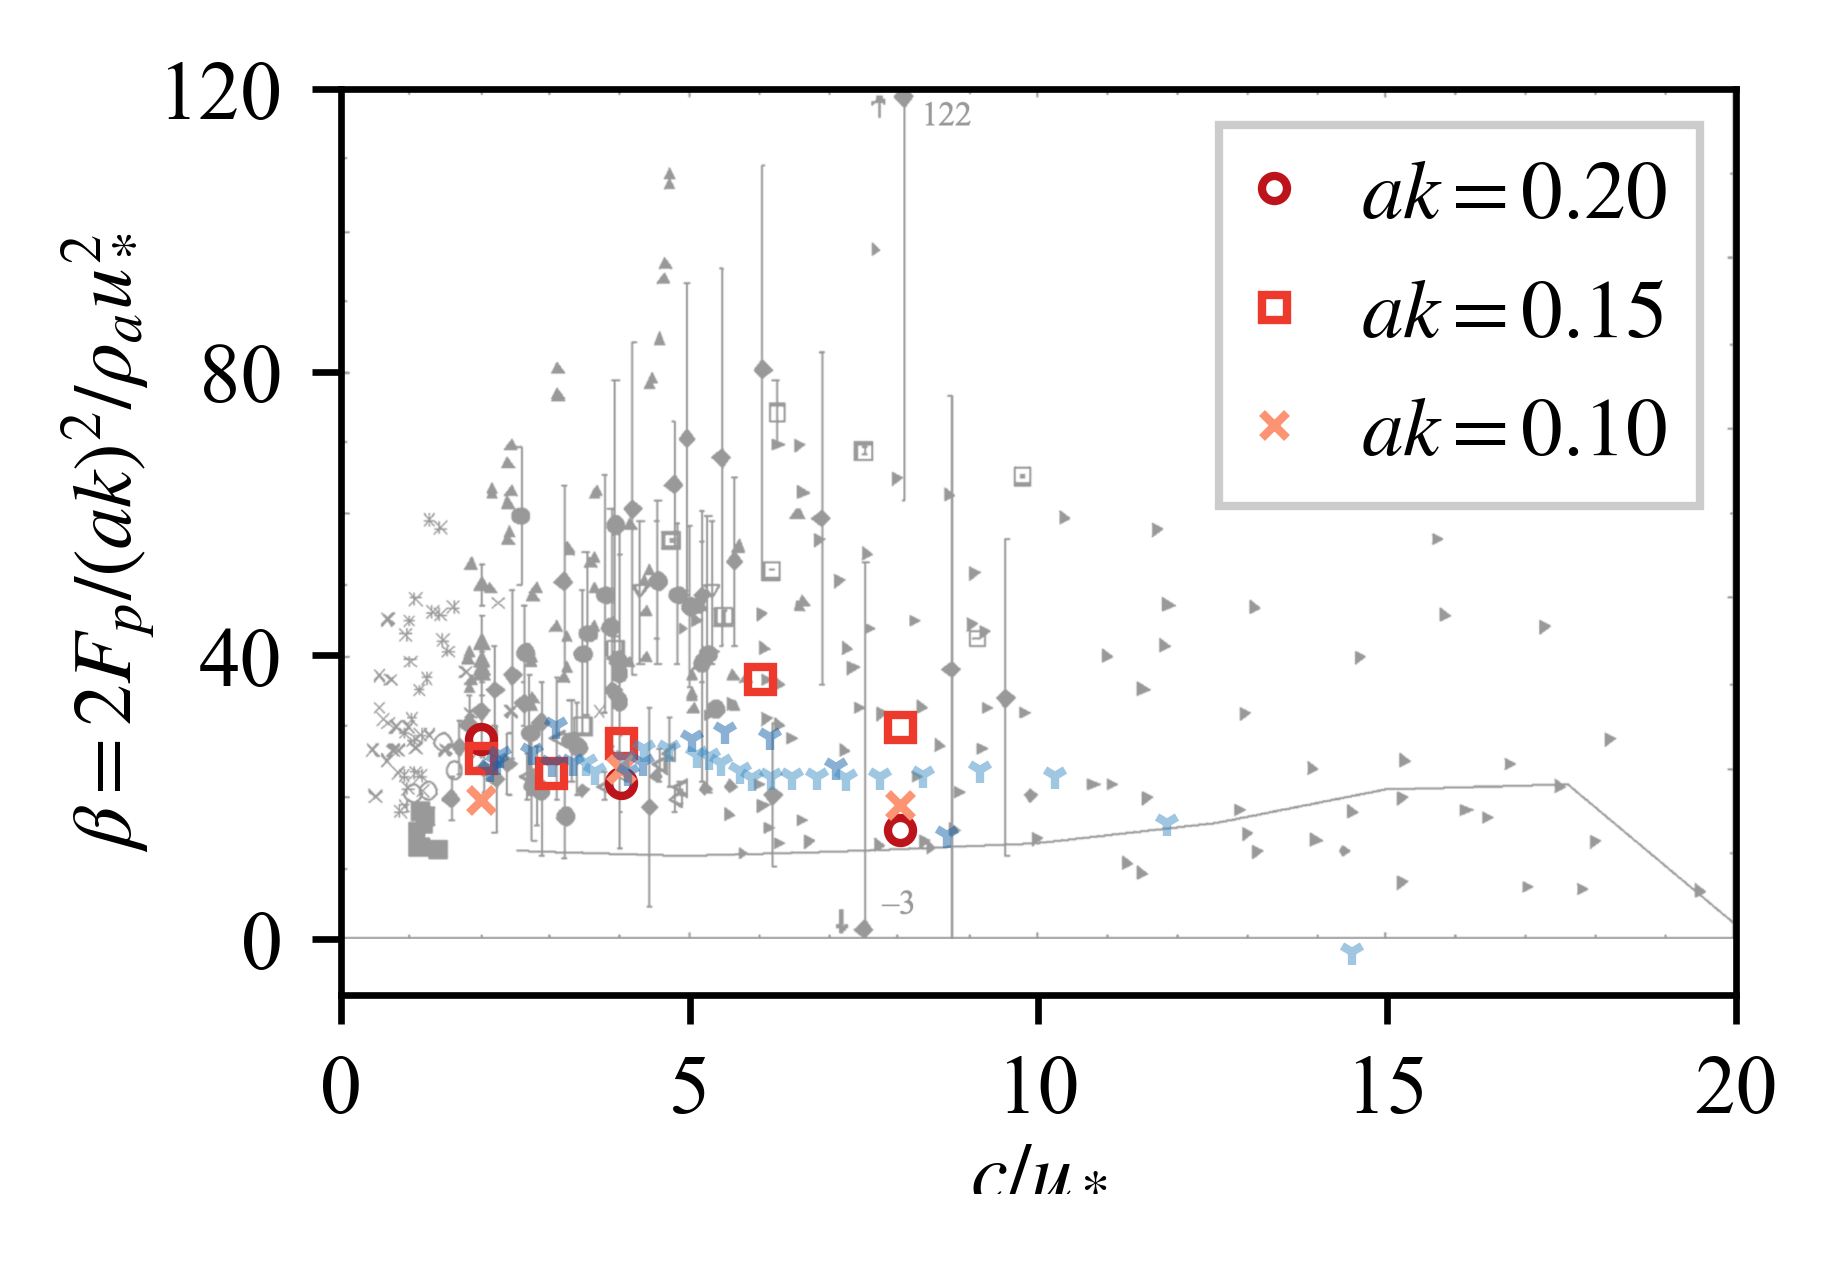

In [171]:
fig = plt.figure(figsize=(3,2)); ax = plt.gca()
import matplotlib.image as mpimg

path = './figures/'
img = mpimg.imread(path+'growth1.png')
pcontour = plt.imshow(img, extent=[-0,20,0,120], aspect='auto', vmax=1, vmin=-1, cmap='coolwarm', alpha=0.4)
# plt.scatter(0.14, 45, s=100, marker = '^', facecolors='none', 
#             edgecolors=plt.get_cmap('tab20c')(4), linewidth=3)
# plt.scatter(0.145, 40, s=100, marker = '>', facecolors='none', 
#             edgecolors=plt.get_cmap('tab20c')(5), linewidth=3)

for case in (case1,case2,case3):
    p1, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case4,case5,case6):
    p5, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='x', mfc='none',
                   lw=0, markersize=3, color=cmap(34), alpha = 1)
# for case in (case13,case14):
#     p7, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='^', mfc='none',
#                    lw=0, markersize=3, color=cmap(32), alpha = 1)

plt.plot(Yang2013_CU6['CU'], Yang2013_CU6['beta'], marker='1', mfc='none', lw=0, markersize=3, markeredgewidth=1,
         color=cmap(15), label='Grare 2009', alpha=0.5)
plt.plot(Yang2013_CU10['CU'], Yang2013_CU10['beta'],marker='1', mfc='none', lw=0, markersize=3, markeredgewidth=1, 
         color=cmap(13), label='Grare 2009', alpha=0.5)
    
# legend = ax.legend([(p1),(p3),(p5),(p7)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$',r'$ak=0.05$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.65, 0.8), handlelength=0.5, frameon=False)
legend = ax.legend([(p1),(p3),(p5)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.6, 0.75), handlelength=0.5, fancybox=False)

legend.get_frame().set_alpha(1)

ax.set_xlabel(r'$c/u_*$', labelpad=0)
ax.set_ylabel(r'$\beta = 2F_p/(ak)^2/\rho_a u_*^2$', labelpad=0)

ax.set_yticks(np.arange(0,20,10))
ax.set_yticks(np.arange(0,160,40))

# ax.text(-0.025, 0.5, r'$\frac{\bar{\beta}}{2\pi}\frac{\rho_w}{\rho_a}\frac{c^2}{u_*^2}$', 
#         ha='center', va='center', rotation=90., fontsize=20, transform=ax.transAxes)
# plt.axis('off')
# fig.savefig(path+'Peirson_comp.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/beta.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/beta.eps', bbox_inches='tight', pad_inches=0.1)

28.23260475091349
21.92877219152583
15.425497210913115


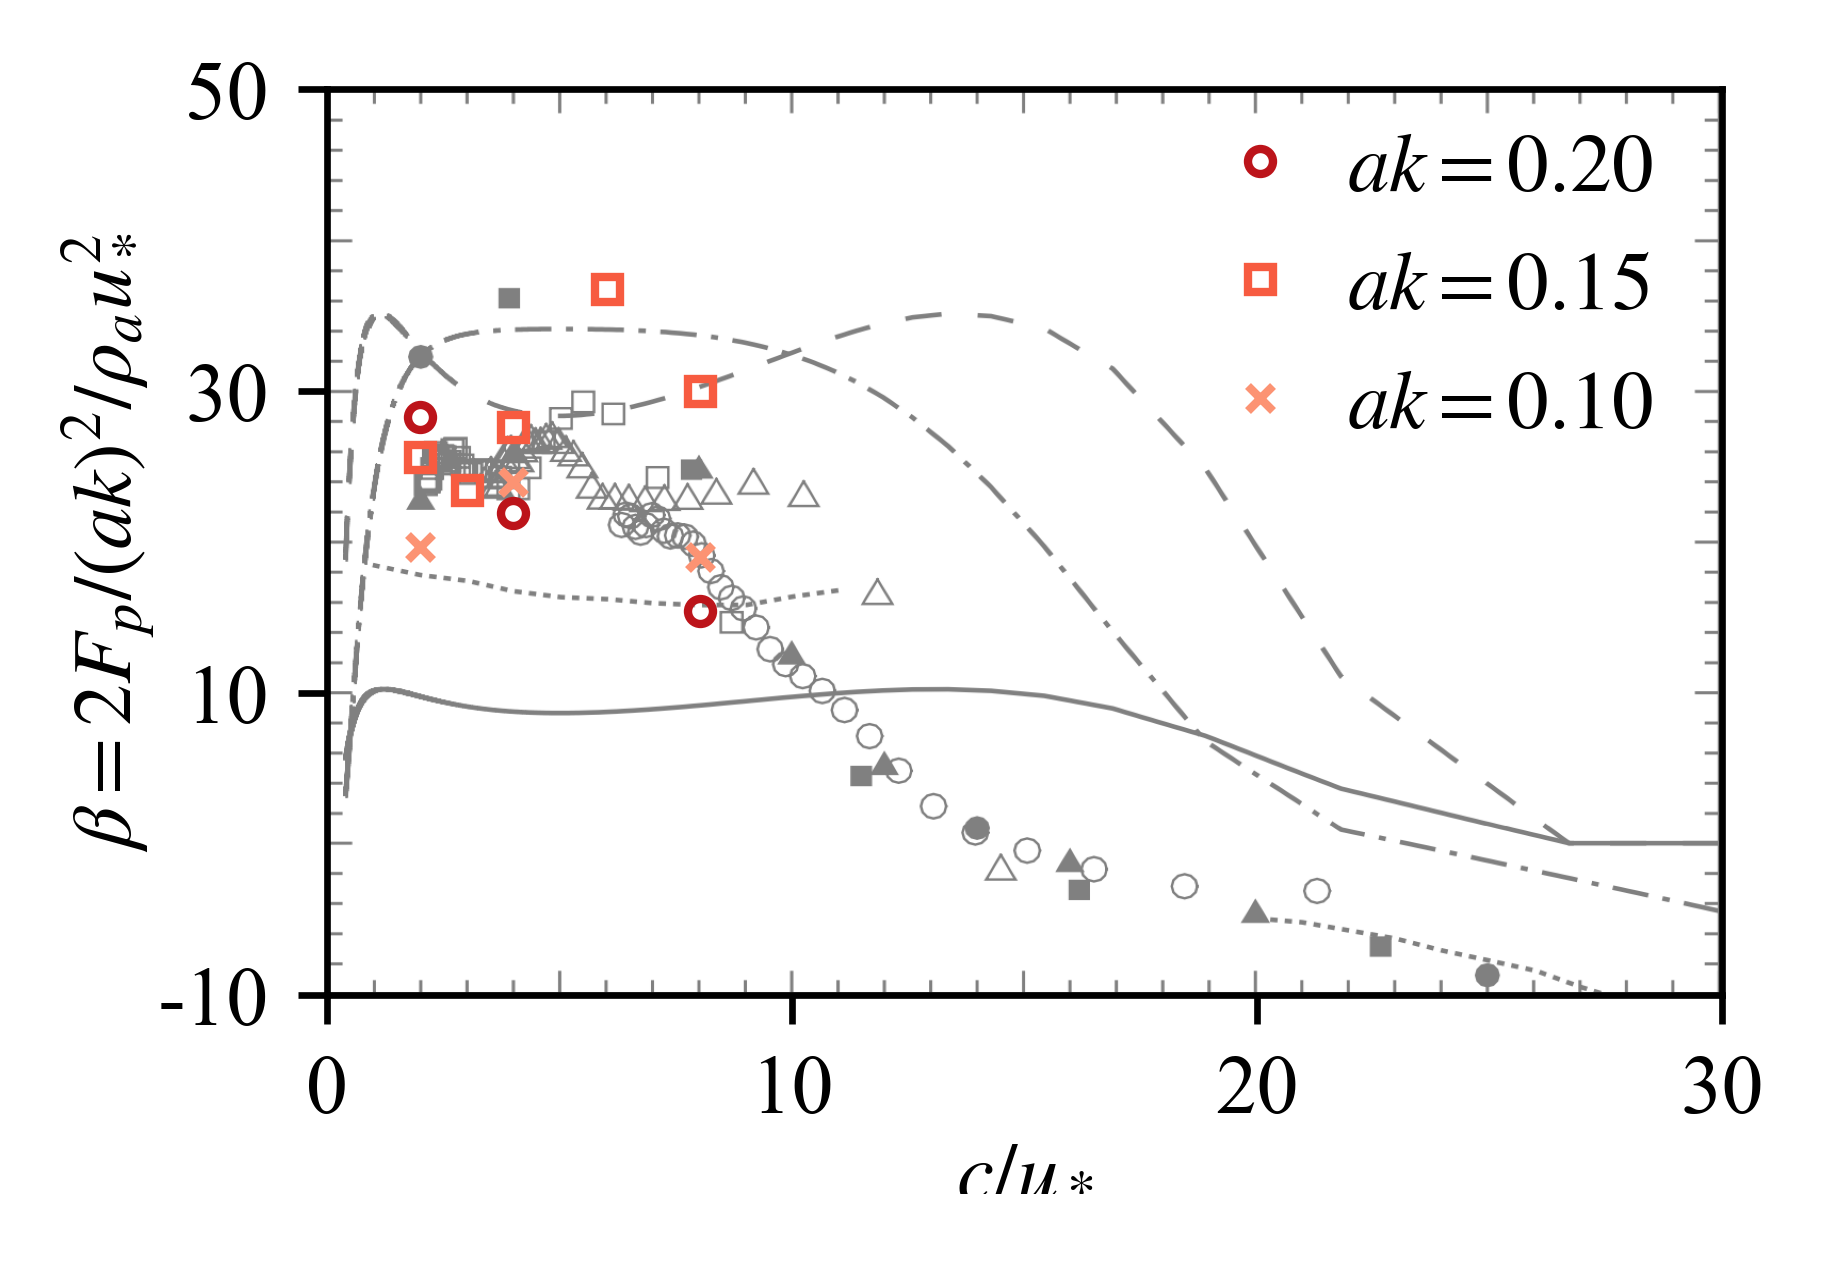

In [165]:
fig = plt.figure(figsize=(3,2)); ax = plt.gca()
import matplotlib.image as mpimg

path = './figures/'
img = mpimg.imread(path+'Yang_Shen_2013.png')
pcontour = plt.imshow(img, extent=[-0,30,-10,50], aspect='auto', vmax=1, vmin=-1, cmap='coolwarm', alpha=0.5)
# plt.scatter(0.14, 45, s=100, marker = '^', facecolors='none', 
#             edgecolors=plt.get_cmap('tab20c')(4), linewidth=3)
# plt.scatter(0.145, 40, s=100, marker = '>', facecolors='none', 
#             edgecolors=plt.get_cmap('tab20c')(5), linewidth=3)

for case in (case1,case2,case3):
    p1, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
    print(2*case.Fp_aver/case.tau0/(case.ak)**2)
for case in (case7,case9,case8,case10,case11):
    p3, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(36), alpha = 1)
for case in (case4,case5,case6):
    p5, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='x', mfc='none',
                   lw=0, markersize=3, color=cmap(34), alpha = 1)
# for case in (case13,case14):
#     p7, = ax.plot(case.wave.c/case.ustar, 2*case.Fp_aver/case.tau0/(case.ak)**2, marker='^', mfc='none',
#                    lw=0, markersize=3, color=cmap(32), alpha = 1)
l = ax.legend([(p1),(p3),(p5)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
               handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.6, 0.78), handlelength=0.5, frameon=False)
ax.set_xlabel(r'$c/u_*$', labelpad=0)
ax.set_ylabel(r'$\beta = 2F_p/(ak)^2/\rho_a u_*^2$', labelpad=0)

ax.set_yticks(np.arange(-10,60,20))
# ax.text(-0.025, 0.5, r'$\frac{\bar{\beta}}{2\pi}\frac{\rho_w}{\rho_a}\frac{c^2}{u_*^2}$', 
#         ha='center', va='center', rotation=90., fontsize=20, transform=ax.transAxes)
# plt.axis('off')
# fig.savefig(path+'Peirson_comp.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/Peirson_comp.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/Peirson_comp.eps', bbox_inches='tight', pad_inches=0.1)

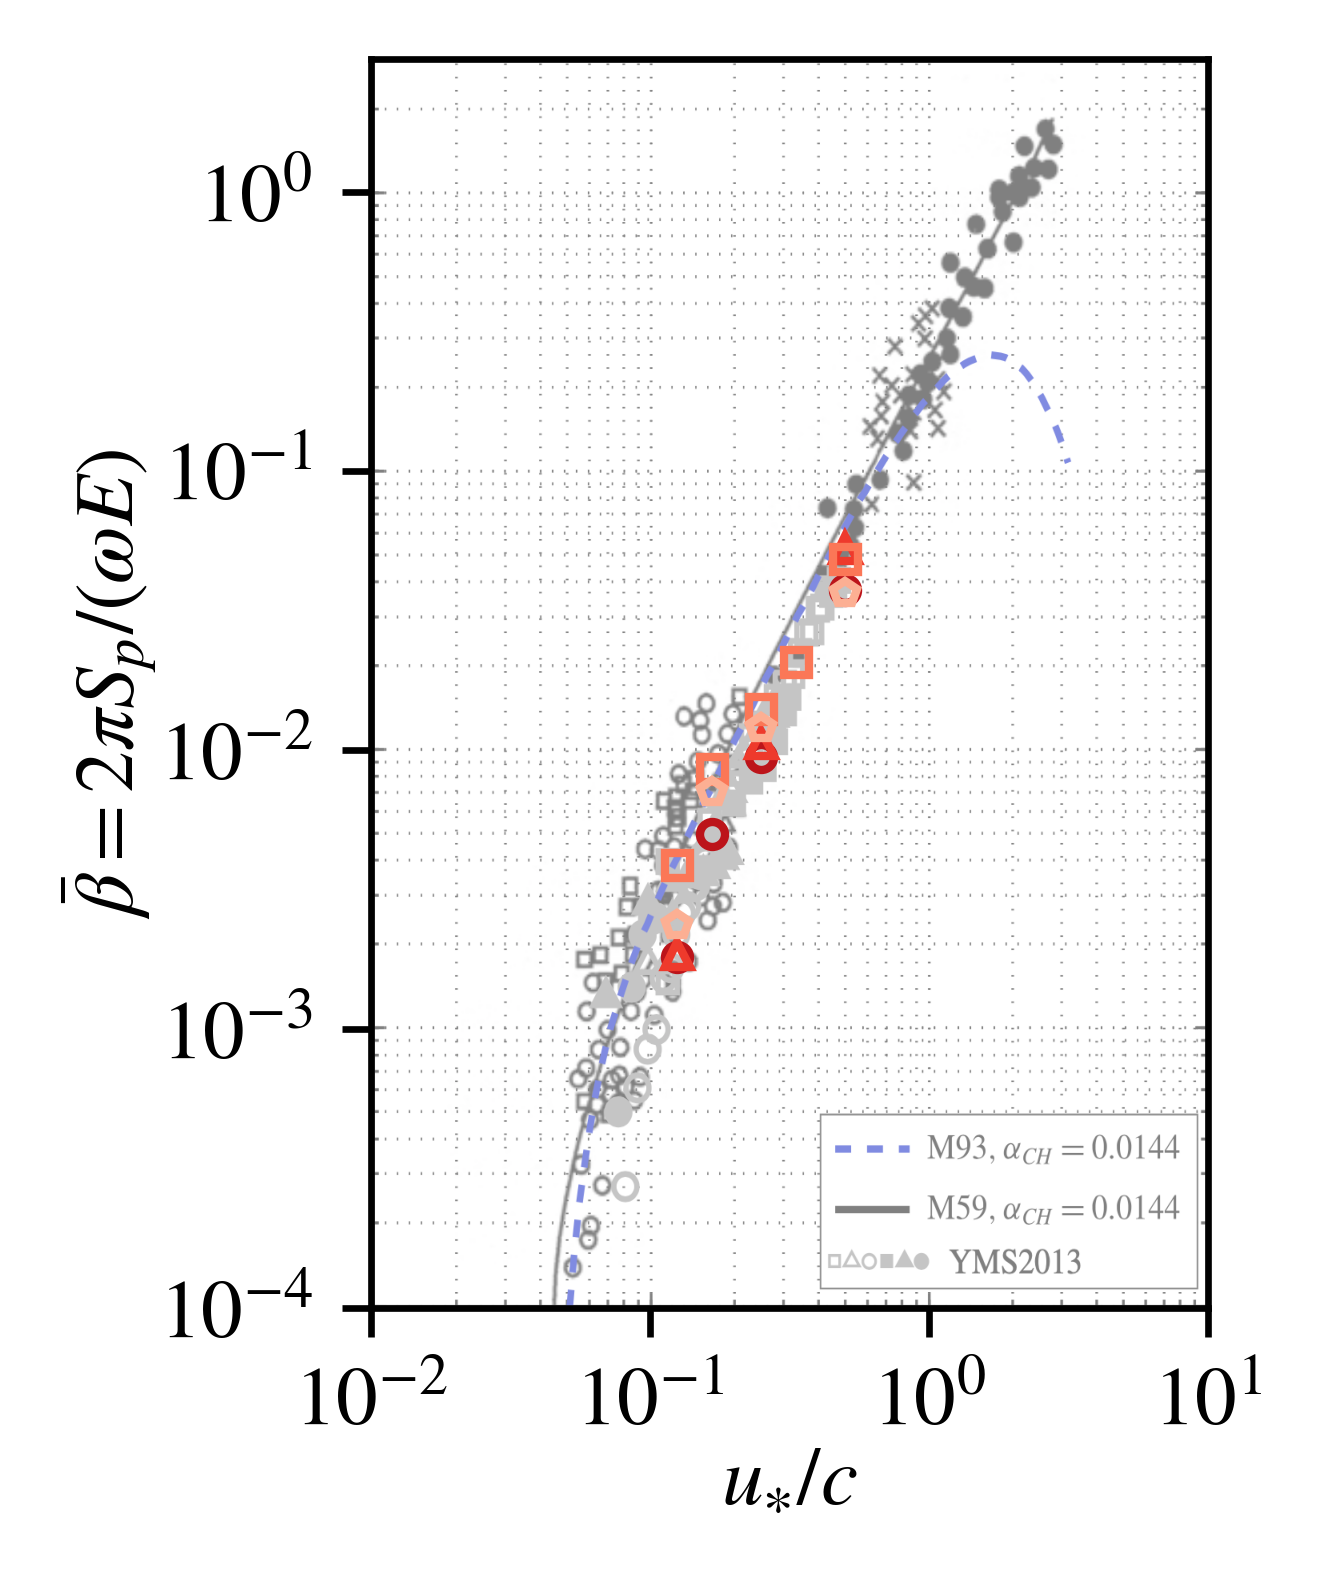

In [130]:
""" Plot the energy (but change the background!)"""
fig = plt.figure(figsize=[1.8,3]); ax = plt.gca()
path = './figures/'
# img = mpimg.imread(path+'growth2_1.png')
img = mpimg.imread(path+'Melville_Fedorov_2015.png')
pcontour = ax.imshow(img, extent=[-2,1,-4,np.log10(2.98)], vmax=1, vmin=-1, cmap='coolwarm', alpha=0.5)

for case in (case14,case15,case18,case16):
    p1, = ax.plot(np.log10(case.ustar/case.wave.c), np.log10(case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega*2*np.pi), marker='o', mfc='none',
                   lw=0, markersize=3, color=cmap(39), alpha = 1)
for case in (case1,case2,case3):
    p1, = ax.plot(np.log10(case.ustar/case.wave.c), np.log10(case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega*2*np.pi), marker='^', mfc='none',
                   lw=0, markersize=3, color=cmap(37), alpha = 1)
for case in (case7,case9,case8,case10,case11):
    p3, = ax.plot(np.log10(case.ustar/case.wave.c), np.log10(case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega*2*np.pi), marker='s', mfc='none',
                   lw=0, markersize=3, color=cmap(35), alpha = 1)
for case in (case4,case5,case17,case6):
    p5, = ax.plot(np.log10(case.ustar/case.wave.c), np.log10(case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega*2*np.pi), marker='p', mfc='none',
                   lw=0, markersize=3, color=cmap(33), alpha = 1)
# for case in (case13,case14):
#     p7, = ax.plot(np.log10(case.ustar/case.wave.c), np.log10(case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega*2*np.pi), marker='^', mfc='none',
#                    lw=0, markersize=3, color=cmap(32), alpha = 1)
    
# l = ax.legend([(p1),(p3),(p5)], [r'$ak=0.20$',r'$ak=0.15$',r'$ak=0.10$'],
#                handler_map={tuple: HandlerTuple(ndivide=None)}, loc='center left', bbox_to_anchor=(0.1, 0.85), fancybox=False)

@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

ax.set_xlabel(r'$u_{\ast}/c$', labelpad=0)
ax.set_ylabel(r'$\bar{\beta} = 2\pi S_{p}/(\omega E)$', labelpad=0)
ax.set_xticks(np.arange(-2, 2, 1))
ax.set_yticks(np.arange(-4, 1, 1))
ax.xaxis.set_major_formatter(fake_log)
ax.yaxis.set_major_formatter(fake_log)
# fig.savefig(path+'Melville_comp.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/Melville_comp.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/Melville_comp.eps', bbox_inches='tight')

0.021428571428571436 0.30714285714285716


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


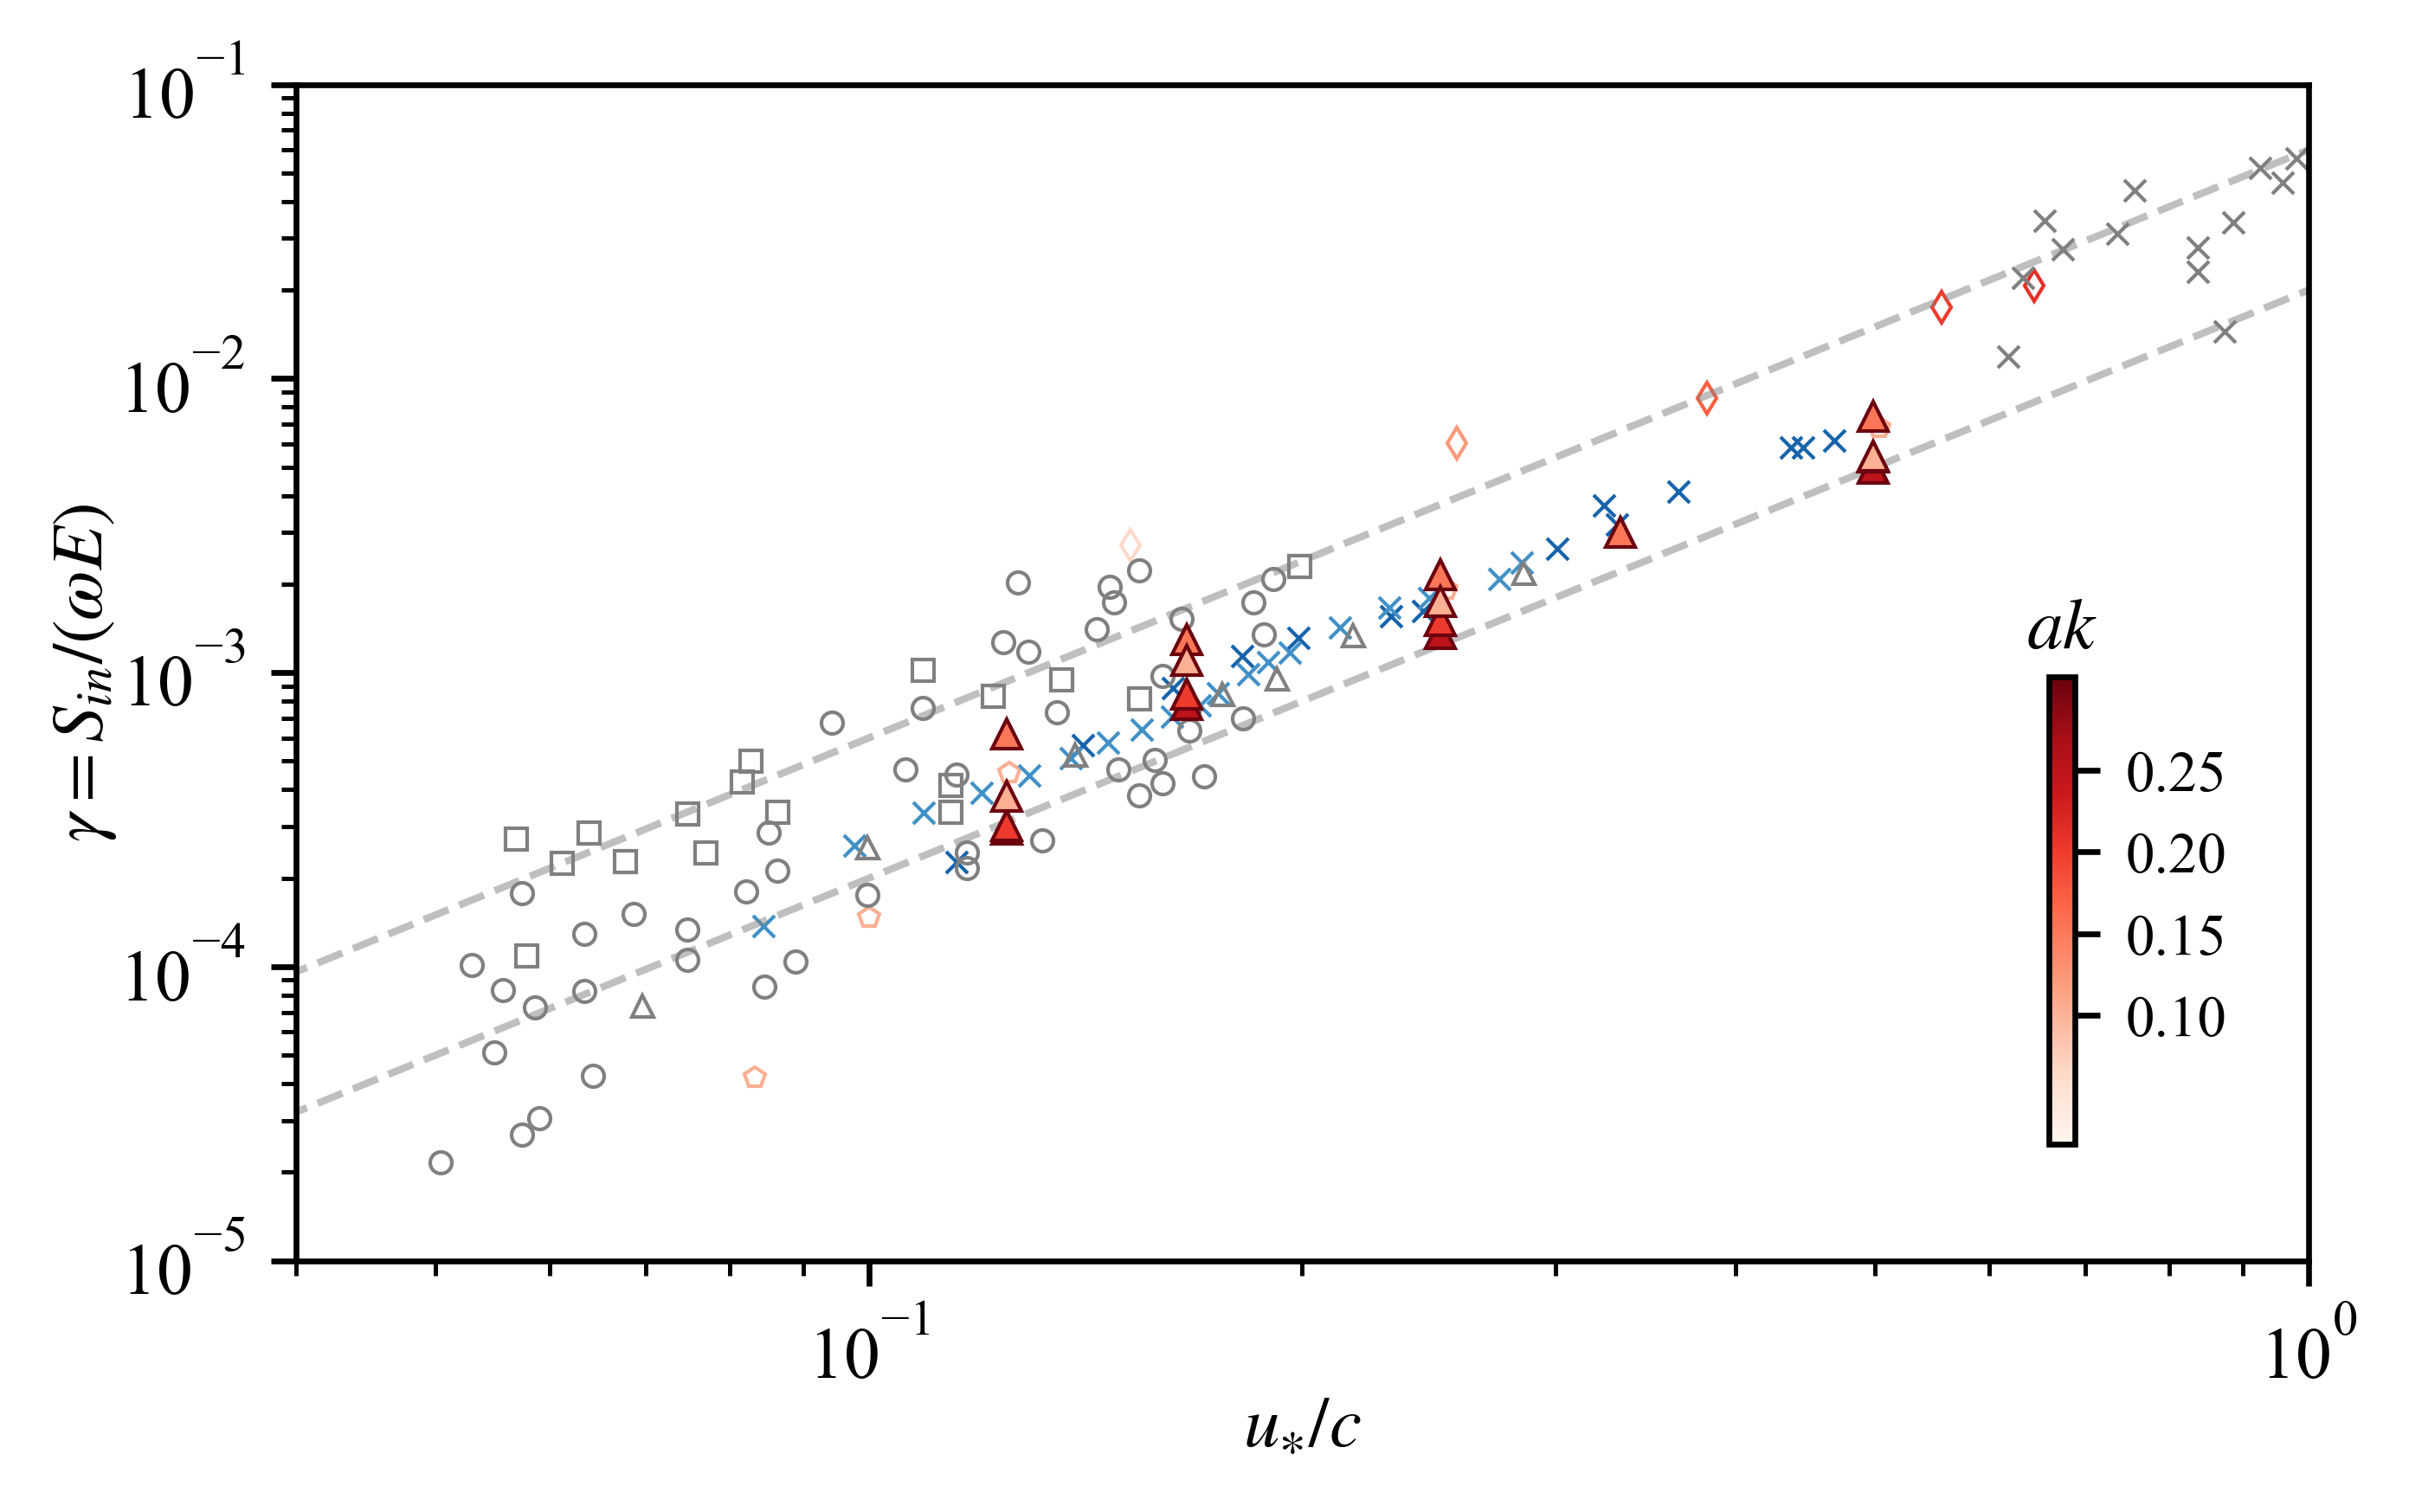

In [90]:
""" Plot the energy (but change the background!)"""
fig = plt.figure(figsize=[5,3]); ax = plt.gca()

""" All other data """
# Kihara 2007
Kihara = pd.read_csv('otherdata/beta/Kihara2007.csv', names=['CU', 'beta'], delimiter = ',')
Kihara = Kihara.sort_values(by='CU', ascending=True)
ax.plot(1/Kihara.CU, Kihara.beta/Kihara.CU**2/850, marker='p', mfc='none',
        lw=0, markersize=3, markeredgewidth=0.5, color=cmap(33), alpha=1)
# Yang 2013: LES with broadband spectrum 
Yang2013_CU6 = pd.read_csv('otherdata/beta/Yang2013_CU6.csv', names=['CU', 'beta'], delimiter = ',')
Yang2013_CU10 = pd.read_csv('otherdata/beta/Yang2013_CU10.csv', names=['CU', 'beta'], delimiter = ',')
ax.plot(1/Yang2013_CU6['CU'], Yang2013_CU6['beta']/Yang2013_CU6['CU']**2/850, marker='x', mfc='none', 
        lw=0, markersize=3, markeredgewidth=0.5, color=cmap(15), alpha=1)
ax.plot(1/Yang2013_CU10['CU'], Yang2013_CU10['beta']/Yang2013_CU10['CU']**2/850, marker='x', mfc='none',
        lw=0, markersize=3, markeredgewidth=0.5, color=cmap(13), alpha=1)
# Buckley 2020
UC = np.array((0.152,0.256,0.382,0.556,0.645))
beta = np.array((0.017, 0.038, 0.054, 0.11, 0.13))
ak = np.array((0.06, 0.12, 0.17, 0.2, 0.21)) # color value 0.2 ->
for (UC_,beta_,ak_) in zip(UC,beta,ak):
    cchoice = plt.get_cmap('Reds')((ak_-0.075)/(0.25-0.075)*0.6+0.2) ### RESCALE!
    plt.plot(UC_, beta_/2/np.pi, marker='d', mfc='none', 
             lw=0, markersize=3, markeredgewidth=0.5, color=cchoice)
# Add color bar

# Plants 1982 compiled
# Shemdin 1967, triangle
UC = np.array((0.285,0.217,0.192,0.176,0.139,0.0998,0.0696))
beta = np.array((0.0137,0.00843,0.00599,0.00532,0.00330,0.00160,0.000464))
ax.plot(UC, beta/2/np.pi, marker='^', mfc='none',
        lw=0, markersize=3, markeredgewidth=0.5, color='gray', alpha=1)
# Snyder 1981, open circle
Snyder1 = pd.read_csv('otherdata/beta/Snyder1981_fixed.csv', names=['UC', 'beta'], delimiter = ',')
ax.plot(Snyder1.UC, Snyder1.beta/2/np.pi, marker='o', mfc='none',
        lw=0, markersize=3, markeredgewidth=0.5, color='gray', alpha=1)
# Snyder 1981, open square
Snyder2 = pd.read_csv('otherdata/beta/Snyder1981_follow.csv', names=['UC', 'beta'], delimiter = ',')
ax.plot(Snyder2.UC, Snyder2.beta/2/np.pi, marker='s', mfc='none',
        lw=0, markersize=3, markeredgewidth=0.5, color='gray', alpha=1)
# Wu 1979
Wu = pd.read_csv('otherdata/beta/Wu1979.csv', names=['UC', 'beta'], delimiter = ',')
ax.plot(Wu.UC, Wu.beta/2/np.pi, marker='x', mfc='none',
        lw=0, markersize=3, markeredgewidth=0.5, color='gray', alpha=1)

# Plant's estimation
# β = (0.04 ± 0.02)(u∗/c)2
UC = 10**(np.linspace(-2,0,100))
plt.plot(UC, 0.06*UC**2, '--', lw=1, c='gray', alpha=0.5)
plt.plot(UC, 0.02*UC**2, '--', lw=1, c='gray', alpha=0.5)


for case in (case14,case15,case18,case16):
    p1, = ax.plot(case.ustar/case.wave.c, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='^',
                  lw=0, markersize=4, mfc=cmap(39), color=plt.get_cmap('Reds')(0.99), alpha = 1, markeredgewidth=0.5)
for case in (case1,case2,case19,case3):
    p1, = ax.plot(case.ustar/case.wave.c, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='^', 
                  lw=0, markersize=4, mfc=cmap(37), color=plt.get_cmap('Reds')(0.99), alpha = 1, markeredgewidth=0.5)
for case in (case7,case9,case8,case10,case11):
    p3, = ax.plot(case.ustar/case.wave.c, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='^',
                  lw=0, markersize=4, mfc=cmap(35), color=plt.get_cmap('Reds')(0.99), alpha = 1, markeredgewidth=0.5)
for case in (case4,case5,case17,case6):
    p5, = ax.plot(case.ustar/case.wave.c, case.Fp_aver*case.wave.c/case.E_rms[0]/case.wave.omega, marker='^', 
                  lw=0, markersize=4, mfc=cmap(33), color=plt.get_cmap('Reds')(0.99), alpha = 1, markeredgewidth=0.5)


ratio = (0.25-0.1)/(0.6*7/8) # ak per unit colour
vmin = 0.1 - ratio*(0.2+0.6*1/8)
vmax = 0.25 + ratio*0.2
print(vmin,vmax)
ax2  = fig.add_axes([0.8,0.20,0.01,0.3])
norm = mpl.colors.Normalize(vmin=vmin,vmax=vmax)
cbar = mpl.colorbar.ColorbarBase(ax2,cmap='Reds',norm=norm,orientation='vertical',ticks=(0.1,0.15,0.2,0.25))
cbar.ax.text(0.5, 1.1, r'$ak$', ha='center', va='center', transform=cbar.ax.transAxes)
ax2.tick_params(axis='both', which='major', labelsize=8)

ax.set_xlabel(r'$u_{\ast}/c$', labelpad=0)
ax.set_ylabel(r'$\gamma = S_{in}/(\omega E)$', labelpad=0)
ax.set_xlim([0.04, 1])
ax.set_xscale('log')
ax.set_ylim([0.00001, 0.1])
ax.set_yscale('log')
# fig.savefig(path+'Melville_comp.pdf', bbox_inches='tight', pad_inches=0.1)
fig.savefig('figures_jfm/Growthrate_comp.pdf', bbox_inches='tight')
fig.savefig('figures_jfm/Growthrate_comp.eps', bbox_inches='tight')

In [23]:
ratio = (0.25-0.1)/(0.6*7/8) # ak per unit colour
vmin = 0.1 - ratio*(0.2+0.6*1/8)
vmax = 0.25 + ratio*0.2
print(vmin,vmax)

0.021428571428571436 0.30714285714285716


In [ ]:
@plt.FuncFormatter
def fake_log(x, pos):
    'The two args are the value and tick position'
    return r'$10^{%d}$' % (x)

ax.set_xlabel(r'$u_{\ast}/c$', labelpad=0)
ax.set_ylabel(r'$\gamma = S_{in}/(\omega E)$', labelpad=0)
ax.set_xticks((-1, 0))
ax.set_xlim([np.log10(0.04), 0])
ax.set_yticks(np.arange(-4, -1, 1))
ax.xaxis.set_major_formatter(fake_log)
ax.yaxis.set_major_formatter(fake_log)